In [1]:
%matplotlib inline


# Simple 1D Kernel Density Estimation
This example uses the :class:`~sklearn.neighbors.KernelDensity` class to
demonstrate the principles of Kernel Density Estimation in one dimension.

The first plot shows one of the problems with using histograms to visualize
the density of points in 1D. Intuitively, a histogram can be thought of as a
scheme in which a unit "block" is stacked above each point on a regular grid.
As the top two panels show, however, the choice of gridding for these blocks
can lead to wildly divergent ideas about the underlying shape of the density
distribution.  If we instead center each block on the point it represents, we
get the estimate shown in the bottom left panel.  This is a kernel density
estimation with a "top hat" kernel.  This idea can be generalized to other
kernel shapes: the bottom-right panel of the first figure shows a Gaussian
kernel density estimate over the same distribution.

Scikit-learn implements efficient kernel density estimation using either
a Ball Tree or KD Tree structure, through the
:class:`~sklearn.neighbors.KernelDensity` estimator.  The available kernels
are shown in the second figure of this example.

The third figure compares kernel density estimates for a distribution of 100
samples in 1 dimension.  Though this example uses 1D distributions, kernel
density estimation is easily and efficiently extensible to higher dimensions
as well.


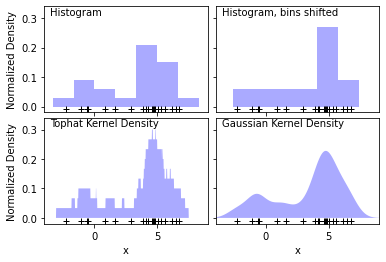

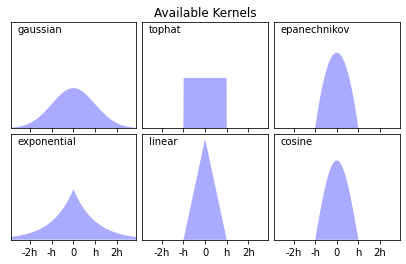

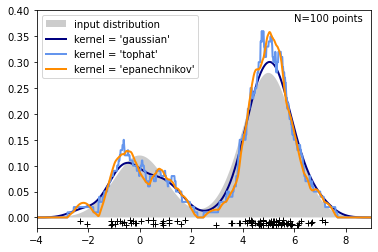

In [20]:
# Author: Jake Vanderplas <jakevdp@cs.washington.edu>
#
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from sklearn.utils.fixes import parse_version

# `normed` is being deprecated in favor of `density` in histograms
if parse_version(matplotlib.__version__) >= parse_version("2.1"):
    density_param = {"density": True}
else:
    density_param = {"normed": True}

# ----------------------------------------------------------------------
# Plot the progression of histograms to kernels
np.random.seed(1)
N = 20
X = np.concatenate(
    (np.random.normal(0, 1, int(0.3 * N)), np.random.normal(5, 1, int(0.7 * N)))
)[:, np.newaxis]
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
bins = np.linspace(-5, 10, 10)

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# histogram 1
ax[0, 0].hist(X[:, 0], bins=bins, fc="#AAAAFF", **density_param)
ax[0, 0].text(-3.5, 0.31, "Histogram")

# histogram 2
ax[0, 1].hist(X[:, 0], bins=bins + 0.75, fc="#AAAAFF", **density_param)
ax[0, 1].text(-3.5, 0.31, "Histogram, bins shifted")

# tophat KDE
kde = KernelDensity(kernel="tophat", bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 0].fill(X_plot[:, 0], np.exp(log_dens), fc="#AAAAFF")
ax[1, 0].text(-3.5, 0.31, "Tophat Kernel Density")

# Gaussian KDE
kde = KernelDensity(kernel="gaussian", bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 1].fill(X_plot[:, 0], np.exp(log_dens), fc="#AAAAFF")
ax[1, 1].text(-3.5, 0.31, "Gaussian Kernel Density")

for axi in ax.ravel():
    axi.plot(X[:, 0], np.full(X.shape[0], -0.01), "+k")
    axi.set_xlim(-4, 9)
    axi.set_ylim(-0.02, 0.34)

for axi in ax[:, 0]:
    axi.set_ylabel("Normalized Density")

for axi in ax[1, :]:
    axi.set_xlabel("x")

# ----------------------------------------------------------------------
# Plot all available kernels
X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)


def format_func(x, loc):
    if x == 0:
        return "0"
    elif x == 1:
        return "h"
    elif x == -1:
        return "-h"
    else:
        return "%ih" % x


for i, kernel in enumerate(
    ["gaussian", "tophat", "epanechnikov", "exponential", "linear", "cosine"]
):
    axi = ax.ravel()[i]
    log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(X_plot)
    axi.fill(X_plot[:, 0], np.exp(log_dens), "-k", fc="#AAAAFF")
    axi.text(-2.6, 0.95, kernel)

    axi.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    axi.xaxis.set_major_locator(plt.MultipleLocator(1))
    axi.yaxis.set_major_locator(plt.NullLocator())

    axi.set_ylim(0, 1.05)
    axi.set_xlim(-2.9, 2.9)

ax[0, 1].set_title("Available Kernels")

# ----------------------------------------------------------------------
# Plot a 1D density example
N = 100
np.random.seed(1)
X = np.concatenate(
    (np.random.normal(0, 1, int(0.3 * N)), np.random.normal(5, 1, int(0.7 * N)))
)[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = 0.3 * norm(0, 1).pdf(X_plot[:, 0]) + 0.7 * norm(5, 1).pdf(X_plot[:, 0])

fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc="black", alpha=0.2, label="input distribution")
colors = ["navy", "cornflowerblue", "darkorange"]
kernels = ["gaussian", "tophat", "epanechnikov"]
lw = 2

for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(
        X_plot[:, 0],
        np.exp(log_dens),
        color=color,
        lw=lw,
        linestyle="-",
        label="kernel = '{0}'".format(kernel),
    )

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc="upper left")
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), "+k")

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()

In [18]:
X.shape,X_plot.shape

((17000, 1), (1000, 1))

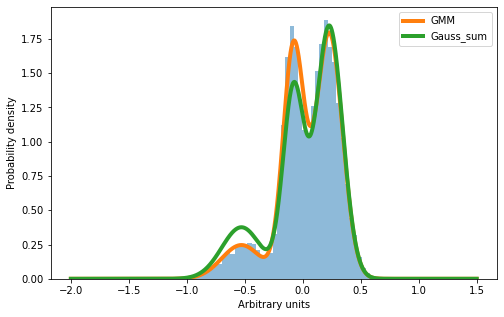

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Define simple gaussian
def gauss_function(x, amp, x0, sigma):
    return amp * np.exp(-(x - x0) ** 2. / (2. * sigma ** 2.))

# Generate sample from three gaussian distributions
samples = np.random.normal(-0.5, 0.2, 2000)
samples = np.append(samples, np.random.normal(-0.1, 0.07, 5000))
samples = np.append(samples, np.random.normal(0.2, 0.13, 10000))

# Fit GMM
gmm = GaussianMixture(n_components=3, covariance_type="full", tol=0.001)
gmm = gmm.fit(X=np.expand_dims(samples, 1))

# Evaluate GMM
gmm_x = np.linspace(-2, 1.5, 5000)
gmm_y = np.exp(gmm.score_samples(gmm_x.reshape(-1, 1)))

# Construct function manually as sum of gaussians
gmm_y_sum = np.full_like(gmm_x, fill_value=0, dtype=np.float32)
for m, c, w in zip(gmm.means_.ravel(), gmm.covariances_.ravel(),
               gmm.weights_.ravel()):
    gmm_y_sum += gauss_function(x=gmm_x, amp=w, x0=m, sigma=np.sqrt(c))

# Normalize so that integral is 1
gmm_y_sum /= np.trapz(gmm_y_sum, gmm_x)

# Make regular histogram
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[8, 5])
ax.hist(samples, bins=50,density=True, alpha=0.5)
ax.plot(gmm_x, gmm_y, lw=4, label="GMM")
ax.plot(gmm_x, gmm_y_sum, lw=4, label="Gauss_sum")

# Annotate diagram
ax.set_ylabel("Probability density")
ax.set_xlabel("Arbitrary units")

# Draw legend
plt.legend()
plt.show()

In [15]:
samples = np.random.normal(-0.5, 0.2, 2000)
samples = np.append(samples, np.random.normal(-0.1, 0.07, 5000))
samples = np.append(samples, np.random.normal(0.2, 0.13, 10000))
X = np.expand_dims(samples, 1)
X.shape, samples.shape

((17000, 1), (17000,))